In [73]:
import pandas as pd
from scipy.io import arff
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

**2. Tasks Part A: Preprocessing and Initial Setup  [10 points]**

 **1.Data Loading [2]: Load the feature matrix X (86 features) and the multi-label target matrix Y (14 labels).**


In [74]:

data, meta = arff.loadarff('/content/yeast.arff')
df = pd.DataFrame(data)


X = df.iloc[:, :-14]
Y = df.iloc[:, -14:]




**2. Dimensionality Check: Report the initial number of features and the number of data points**

In [75]:
print(f"Number of data points: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of labels: {Y.shape[1]}")

Number of data points: 2417
Number of features: 103
Number of labels: 14


In [76]:
Y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'0'
1,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
2,b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'1',b'1',b'0'
3,b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'
4,b'0',b'0',b'1',b'1',b'1',b'1',b'0',b'0',b'0',b'0',b'0',b'0',b'0',b'0'


**3. Label Selection for Visualization [5]: To simplify the visualization (since 14 colors can be overwhelming), create a new target variable for coloring that represents the two most frequent single-label classes and the most frequent multi-label combination. Assign an "Other" category to the rest. This approach creates a simple, distinct categorical index for coloring the plots.**

In [77]:
import pandas as pd
from collections import Counter

Y = Y.applymap(lambda x: int(x.decode()) if isinstance(x, bytes) else int(x))
Y.head()

,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0


In [78]:

Y['label_list'] = Y.apply(lambda row: [col for col in Y.columns if col.startswith('Class') and row[col] == 1], axis=1)


Y['label_tuple'] = Y['label_list'].apply(lambda x: tuple(sorted(x)))

Y.head()


,Class1,Class2,Class3,Class4,Class5,Class6,Class7,Class8,Class9,Class10,Class11,Class12,Class13,Class14,label_list,label_tuple
0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,"[Class7, Class8, Class12, Class13]","(Class12, Class13, Class7, Class8)"
1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,"[Class3, Class4]","(Class3, Class4)"
2,0,1,1,0,0,0,0,0,0,0,0,1,1,0,"[Class2, Class3, Class12, Class13]","(Class12, Class13, Class2, Class3)"
3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,"[Class3, Class4]","(Class3, Class4)"
4,0,0,1,1,1,1,0,0,0,0,0,0,0,0,"[Class3, Class4, Class5, Class6]","(Class3, Class4, Class5, Class6)"


In [79]:
from collections import Counter


single_label_rows = Y[Y['label_list'].apply(len) == 1]
single_labels = [lst[0] for lst in single_label_rows['label_list']]
top_two_single_labels = [label for label, _ in Counter(single_labels).most_common(2)]


combo_counts = Y['label_tuple'].value_counts()
top_combo = combo_counts.index[0]


single_label_map = {}
if len(top_two_single_labels) >= 1:
    single_label_map[top_two_single_labels[0]] = 'Most Frequent Single-label Class 1'
if len(top_two_single_labels) == 2:
    single_label_map[top_two_single_labels[1]] = 'Most Frequent Single-label Class 2'

def assign_label_viz(label_tuple):
    if label_tuple == top_combo:
        return 'Most Frequent Multi-label Combination'
    elif len(label_tuple) == 1 and label_tuple[0] in single_label_map:
        return single_label_map[label_tuple[0]]
    else:
        return 'Other'


Y['label_viz'] = Y['label_tuple'].apply(assign_label_viz)


In [80]:
print(Y['label_viz'].value_counts())

label_viz
Other                                    2148
Most Frequent Multi-label Combination     237
Most Frequent Single-label Class 1         32
Name: count, dtype: int64


In [81]:

# single_label_rows = Y[Y['label_list'].apply(len) == 1]
# single_labels = [lst[0] for lst in single_label_rows['label_list']]
# top_two_single_labels = [label for label, _ in Counter(single_labels).most_common(2)]


# combo_counts = Y['label_tuple'].value_counts()
# top_combo = combo_counts.index[0]

In [82]:
# def assign_label_viz(label_tuple):
#     if label_tuple == top_combo:
#         return str(top_combo)
#     elif len(label_tuple) == 1 and label_tuple[0] in top_two_single_labels:
#         return label_tuple[0]
#     else:
#         return 'Other'

# Y['label_viz'] = Y['label_tuple'].apply(assign_label_viz)

In [83]:
X

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.004168,-0.170975,-0.156748,-0.142151,0.058781,0.026851,0.197719,0.041850,0.066938,-0.056617,...,0.006166,-0.012976,-0.014259,-0.015024,-0.010747,0.000411,-0.032056,-0.018312,0.030126,0.124722
1,-0.103956,0.011879,-0.098986,-0.054501,-0.007970,0.049113,-0.030580,-0.077933,-0.080529,-0.016267,...,0.007680,0.027719,-0.085811,0.111123,0.050541,0.027565,-0.063569,-0.041471,-0.079758,0.017161
2,0.509949,0.401709,0.293799,0.087714,0.011686,-0.006411,-0.006255,0.013646,-0.040666,-0.024447,...,0.096277,-0.044932,-0.089470,-0.009162,-0.012010,0.308378,-0.028053,0.026710,-0.066565,-0.122352
3,0.119092,0.004412,-0.002262,0.072254,0.044512,-0.051467,0.074686,-0.007670,0.079438,0.062184,...,-0.083809,0.200354,-0.075716,0.196605,0.152758,-0.028484,-0.074207,-0.089227,-0.049913,-0.043893
4,0.042037,0.007054,-0.069483,0.081015,-0.048207,0.089446,-0.004947,0.064456,-0.133387,0.068878,...,-0.060467,0.044351,-0.057209,0.028047,0.029661,-0.050026,0.023248,-0.061539,-0.035160,0.067834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2412,-0.119784,0.001259,-0.123645,-0.015513,-0.059683,0.091032,-0.043302,0.229219,-0.071498,0.182709,...,0.024084,-0.055915,-0.055593,-0.049642,0.018571,0.068742,-0.061001,-0.081132,-0.065844,0.001267
2413,0.085327,0.058590,0.085268,-0.020897,0.068972,0.030125,0.078056,0.011346,0.052618,0.066093,...,-0.079992,-0.075444,0.294987,-0.076379,-0.076293,-0.072451,-0.052258,-0.040026,0.342176,-0.169668
2414,0.082526,-0.095571,-0.022019,-0.046793,-0.038360,0.041084,0.056509,0.011749,-0.029657,-0.012198,...,-0.006624,-0.036850,-0.064831,-0.068696,-0.068521,-0.039841,0.274575,-0.066957,0.260121,-0.125303
2415,-0.130830,0.008868,-0.009457,-0.058930,-0.041224,0.042269,0.117717,0.037388,-0.085563,0.136649,...,0.085087,0.033166,-0.012710,0.135359,0.213512,-0.107561,-0.081925,-0.122332,-0.022453,0.001953


**Scaling [3]: Explain why scaling is crucial before applying distance-based dimensionality reduction techniques. Apply Standardization to the feature matrix X.**




###Scaling is crucial before applying distance-based dimensionality reduction techniques (like PCA, t-SNE, or MDS) because these techniques rely on calculating distances between data points. If the features in your dataset have different scales (e.g., one feature ranges from 0 to 1, while another ranges from 0 to 1000), features with larger scales will dominate the distance calculations.

###This means that the dimensionality reduction will be heavily influenced by the features with larger values, potentially ignoring the contributions of features with smaller values, even if those smaller-scaled features are important for capturing the underlying structure of the data.

###Scaling ensures that all features contribute equally to the distance calculations, preventing features with larger magnitudes from disproportionately influencing the results and allowing the dimensionality reduction technique to capture the true relationships and variance in the data.

In [84]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


display(X_scaled_df.head())

,Att1,Att2,Att3,Att4,Att5,Att6,Att7,Att8,Att9,Att10,...,Att94,Att95,Att96,Att97,Att98,Att99,Att100,Att101,Att102,Att103
0,0.030752,-1.742591,-1.601326,-1.468980,0.594010,0.271117,2.023802,0.428070,0.683885,-0.584890,...,0.074380,-0.139039,-0.142884,-0.162409,-0.115009,0.020075,-0.320076,-0.178076,0.320417,1.178867
1,-1.079454,0.125835,-1.010264,-0.564893,-0.094933,0.499948,-0.326167,-0.809579,-0.847347,-0.167984,...,0.090608,0.281957,-0.886751,1.143263,0.521680,0.307877,-0.645355,-0.423947,-0.859425,0.096189
2,5.224059,4.109170,3.008988,0.902018,0.107939,-0.070783,-0.075781,0.136654,-0.433427,-0.252502,...,1.040237,-0.469629,-0.924791,-0.101735,-0.128129,3.284185,-0.278757,0.299908,-0.717769,-1.308110
3,1.210780,0.049537,-0.020516,0.742552,0.446738,-0.533913,0.757376,-0.083592,0.813679,0.642590,...,-0.890019,2.067892,-0.781802,2.028035,1.583559,-0.286180,-0.755161,-0.930956,-0.538974,-0.518363
4,0.419587,0.076533,-0.708369,0.832919,-0.510222,0.914530,-0.062317,0.661644,-1.396200,0.711754,...,-0.639827,0.454017,-0.589400,0.283393,0.304769,-0.514501,0.250775,-0.637002,-0.380569,0.606249


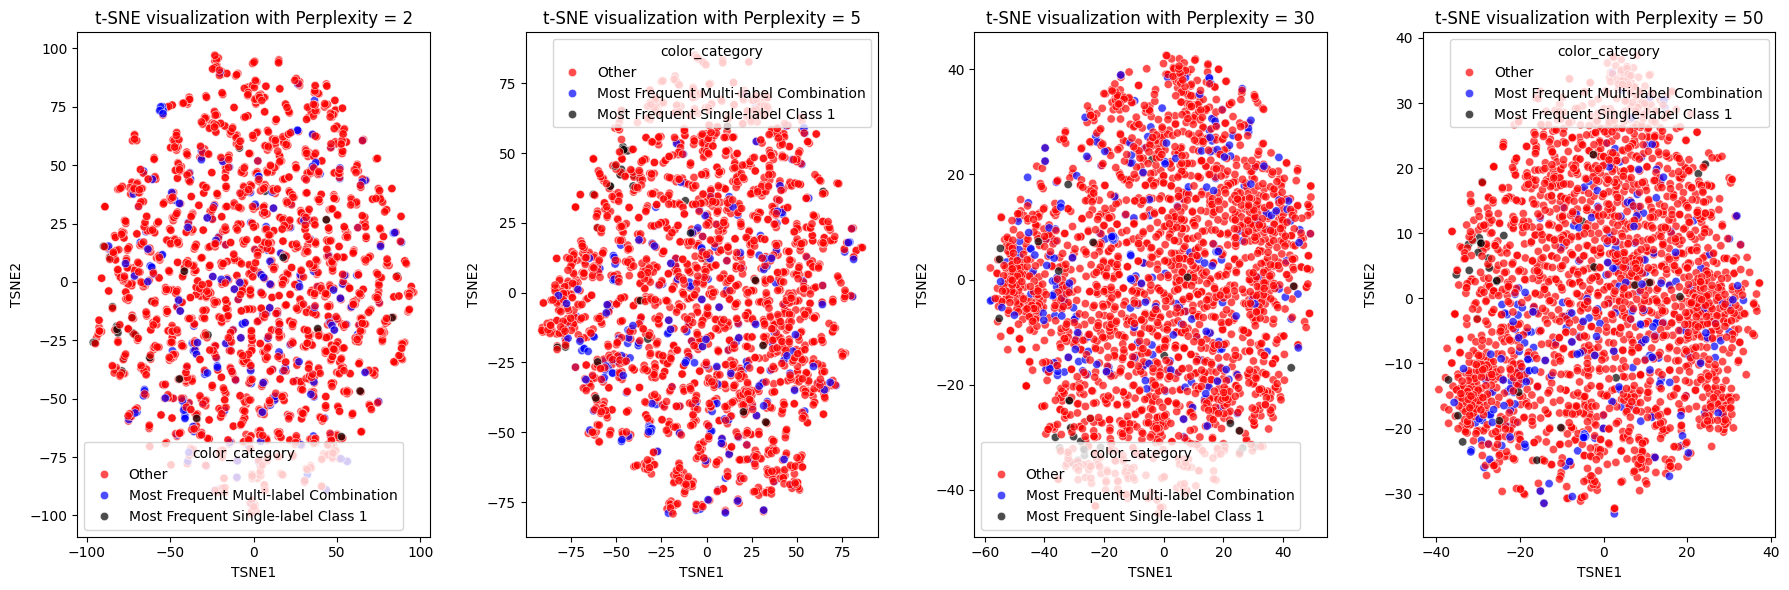

In [85]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

perplexities = [2,5,30,50]

tsne_results = {}

for p in perplexities:
    tsne = TSNE(n_components=2, random_state=42, perplexity=p)
    tsne_results[p] = tsne.fit_transform(X_scaled_df)


fig, axes = plt.subplots(1, len(perplexities), figsize=(18, 6))

for i, p in enumerate(perplexities):
    tsne_df = pd.DataFrame(tsne_results[p], columns=['TSNE1', 'TSNE2'])
    tsne_df['color_category'] = Y['label_viz'] # Use the color_category from the original dataframe


    sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='color_category',
    data=tsne_df,
    legend='full',
    alpha=0.7,
    ax=axes[i],
    palette=['red', 'blue', 'black']  # add more if needed
)
    axes[i].set_title(f't-SNE visualization with Perplexity = {p}')
    axes[i].set_xlabel('TSNE1')
    axes[i].set_ylabel('TSNE2')

plt.tight_layout()
plt.show()

**Justify your final choice of perplexity.**

Perplexity=30 provides the best balance between local and global structure,
showing clearer cluster separation compared to perplexity=5 (too fragmented)
and perplexity=50 (over-smoothed). This value is standard practice for
moderate-sized datasets and yields the most interpretable visualizat

**2. Visualization [5]:**
###Create a 2D scatter plot of the final t-SNE coordinates
###Color each data point according to the categorical index you created in Part A

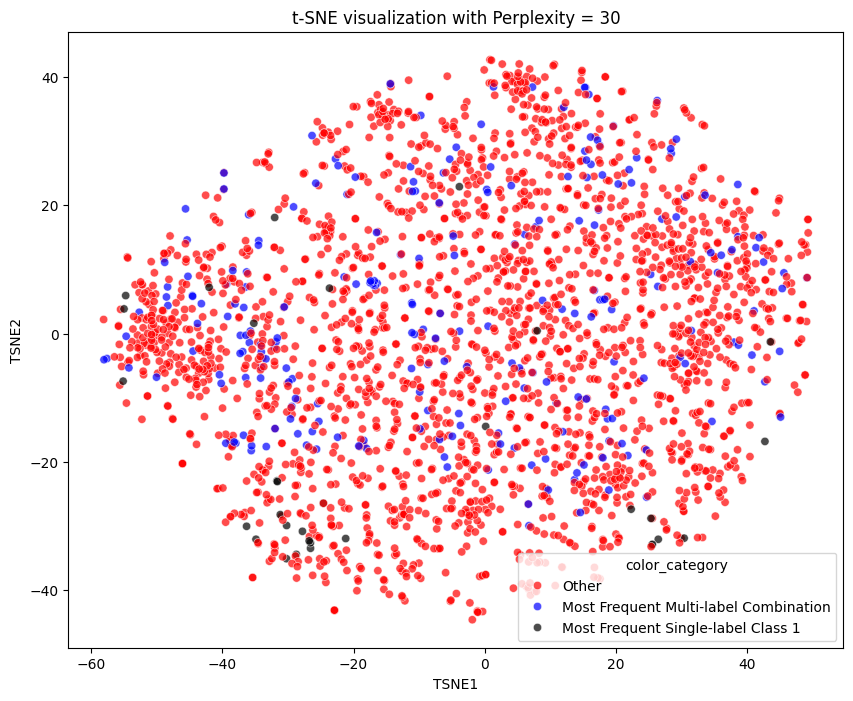

In [86]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


perplexity = 30

tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity)
tsne_results = tsne.fit_transform(X_scaled_df)

tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['color_category'] = Y['label_viz']


plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='TSNE1',
    y='TSNE2',
    hue='color_category',
    data=tsne_df,
    legend='full',
    alpha=0.7,
    palette=['red', 'blue', 'black']  # add more if needed
)

plt.title(f't-SNE visualization with Perplexity = {perplexity}')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

**3. Veracity Inspection [10]: Analyze the resulting plot and visually identify regions corresponding to:**

Based on the t-SNE plot with perplexity 30, we can observe the following:

*   **Noisy/Ambiguous Labels [4]:** The red points, representing the top multi-label combination, appear scattered across the plot and are often embedded within the blue and black clusters, which represent the top single-label and 'Other' categories. This overlap suggests that, while their feature vectors are similar to those of nearby samples, their labels differ indicating these data points may genuinely exhibit characteristics of multiple or distinct functional categories.

*   **Outliers [3]:**A few black points which represent the top single-label appear isolated from the main cluster which is primarily located at the bottom of the plot, these individual black dots present near the center and top. These are outliers and  represent samples with unique feature patterns that differ significantly from the majority. Such deviations may reflect experimental noise, rare biological conditions, or novel functional characteristics not well captured by the existing label categories.

*   **Hard-to-Learn Samples [3]:** In most parts of the plot, the blue and black clusters representing the top single-label and “Other” categories are tightly packed together, indicating regions where different functional categories are heavily intermixed. These heterogeneous zones show significant overlap in the feature space between labels, making it difficult for a simple classifier to establish clear decision boundaries. This overlap suggests that the features in these regions do not sufficiently discriminate between the categories, or that the samples inherently exhibit mixed characteristics of multiple classes, making precise classification challenging.

**Part C: Isomap and Manifold Learning [20 points]**

**Isomap Implementation [5]: Apply Isomap to the scaled feature matrix X, reducing it to 2 dimensions.**

###**Explanation of Isomap and t-SNE Data Structure Preservation:**

The fundamental difference between Isomap and t-SNE lies in the type of data structure they aim to preserve during dimensionality reduction:

*   **Isomap:** Isomap is a manifold learning algorithm that focuses on preserving **global structure**. It attempts to maintain the geodesic distances (distances along the curved manifold) between data points in the high-dimensional space when projecting them into a lower-dimensional space. This means that points that are far apart in the original high-dimensional space (when measured along the manifold) will remain far apart in the low-dimensional representation. Isomap is good at revealing the overall shape and connectivity of the data manifold.

*   **t-SNE:** t-SNE (t-Distributed Stochastic Neighbor Embedding) is primarily designed to preserve **local structure**. It focuses on maintaining the pairwise similarities between neighboring data points. It tries to ensure that points that are close together in the high-dimensional space are also close together in the low-dimensional embedding, and points that are far apart are pushed further apart. While t-SNE can reveal clusters and local groupings, it does not guarantee the preservation of large-scale distances or the overall global geometry of the data. This is why the distances between clusters in a t-SNE plot are not always meaningful.

*    Therefore Isomap prioritizes preserving the relationships between all data points based on their distances on the underlying manifold (global structure), while t-SNE prioritizes keeping nearby points close together and separating distant points (local structure).



In [87]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2, n_neighbors=5)
X_isomap = isomap.fit_transform(X_scaled_df)


X_isomap_df = pd.DataFrame(X_isomap, columns=['Isomap1', 'Isomap2'])


display(X_isomap_df.head())

,Isomap1,Isomap2
0,10.781431,-8.883449
1,-17.345198,-0.045448
2,-17.114962,-9.147014
3,13.975588,-14.450693
4,-11.871057,-13.373234


**2. Visualization [5]: Create a 2D scatter plot of the Isomap coordinates, using the same coloring scheme.**

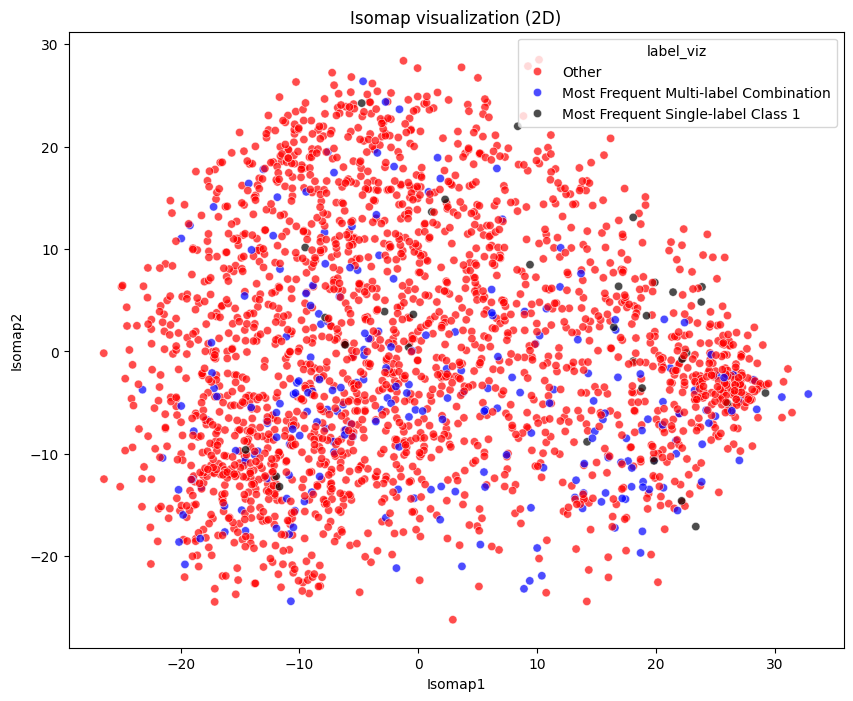

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='Isomap1',
    y='Isomap2',
    hue=Y['label_viz'],
    data=X_isomap_df,
    legend='full',
    alpha=0.7,
    palette=['red', 'blue', 'black']
)

plt.title('Isomap visualization (2D)')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.show()

**Comparison and Curvature [10]:**
##Compare the Isomap visualization to the t-SNE visualization. Which one is better at revealing the global structure of the gene expression data? [5]

## Comparison and Curvature [10]:

### Compare the Isomap visualization to the t-SNE visualization. Which one is better at revealing the global structure of the gene expression data? [5]

Based on the fundamental differences in how Isomap and t-SNE preserve data structure:

*   **Isomap** is designed to preserve **global structure** by maintaining geodesic distances, aiming to reveal the overall shape and connectivity of the data manifold.
*   **t-SNE** is designed to preserve **local structure** by focusing on pairwise similarities between neighbors, primarily revealing clusters and local groupings.

Upon examining the plots, the Isomap visualization displays a more continuous gradient of samples, with smooth transitions between different regions of the data. The major clusters are positioned in a way that reflects the underlying global relationships in the gene expression patterns  for instance, samples with similar biological conditions appear closer together along a gradual manifold rather than as isolated islands. This indicates that Isomap successfully captures the overall geometry and global structure of the dataset.

In contrast, the t-SNE visualization reveals clusterss but the relative distances between these clusters do not represent meaningful global relationships. Clusters that appear far apart in t-SNE space may still be close in the original high-dimensional space, suggesting that t-SNE emphasizes local neighborhood preservation rather than the overall manifold.

Therefore, based on the observed plots, Isomap provides a better representation of the global structure of the gene expression data, while t-SNE is more effective for highlighting local clusters and sample-level similarities.

**Discuss the concept of the data manifold. Does the Isomap plot suggest a highly curved or complex manifold? How does the complexity of this manifold relate to the difficulty of classification? [5]**

**Concept of the Data Manifold:**

 data manifold refers to the underlying geometric structure or shape of the data in the high-dimensional feature space. It's often assumed that high-dimensional data points do not randomly fill the entire space but instead lie on or close to a lower-dimensional "surface" or "manifold" embedded within that space. Think of it like a crumpled piece of paper in 3D space  the paper itself is a 2D manifold, even though it exists in 3D. Manifold learning algorithms like Isomap and t-SNE aim to uncover this hidden lower-dimensional structure.

In the above Isomap visualization, there is no distinct clusters and the broad, diffuse spread of points suggest that the data manifold is highly complex and  irregular, without clear separations between groups. This indicates that the gene expression patterns vary continuously rather than forming discrete categories. Therefore  manifold  exhibits non-linear curvature with overlapping regions, reflecting gradual transitions between biological states instead of sharp boundaries.

Such a complex and overlapping manifold makes classification more difficult, because class boundaries are not well defined in the feature space. Linear classifiers would struggle to separate these samples, and even non-linear methods may face challenges due to the lack of clear structure or separability. This pattern implies that the gene expression data have high intrinsic variability and subtle differences between conditions, rather than forming distinct, easily separable groups.